In [1]:
import tensorflow as tf
import pathlib
import PIL
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.14.1


In [3]:
data_dir = pathlib.Path('../data/Aksara-Sunda')
print(data_dir)

..\data\Aksara-Sunda


..\data\Aksara-Sunda\a\a_1.jpg


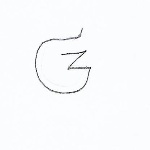

In [4]:
a = list(data_dir.glob('a/*'))
print(a[0])
PIL.Image.open(str(a[0]))

..\data\Aksara-Sunda\vowels_ng\00.jpg


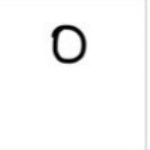

In [5]:
ng = list(data_dir.glob('vowels_ng/*'))
print(ng[0])
PIL.Image.open(str(ng[0]))

In [6]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.15,
    subset='training',
    seed=123,
    label_mode='categorical',
    image_size=(150, 150),
    batch_size=32
)

Found 12460 files belonging to 42 classes.
Using 10591 files for training.


In [7]:
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.15,
    subset='validation',
    seed=123,
    label_mode='categorical',
    image_size=(150, 150),
    batch_size=32
)

Found 12460 files belonging to 42 classes.
Using 1869 files for validation.


In [8]:
class_names = train_dataset.class_names
print(class_names)

['a', 'ae', 'ba', 'ca', 'da', 'e', 'eu', 'fa', 'ga', 'ha', 'i', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'o', 'pa', 'qa', 'ra', 'sa', 'ta', 'u', 'va', 'vowels_e', 'vowels_ee', 'vowels_eu', 'vowels_h', 'vowels_i', 'vowels_la', 'vowels_ng', 'vowels_o', 'vowels_r', 'vowels_u', 'vowels_x', 'vowels_ya', 'wa', 'xa', 'ya', 'za']


# EfficientNet V2B0

In [ ]:
pretrained_model = tf.keras.applications.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=(150, 150, 3),
    pooling='avg',
    classes=len(class_names)
)

for layer in pretrained_model.layers:
    layer.trainable = False
    
efficientnet_model = tf.keras.models.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(716, activation='relu'),
    tf.keras.layers.Dense(42, activation='softmax')
])

efficientnet_model.summary()

In [ ]:
efficientnet_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0005),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

history = efficientnet_model.fit(
    train_dataset,
    epochs=10,
    validation_data=valid_dataset
)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Model Losses')

plt.tight_layout()
plt.show()

In [ ]:
efficientnet_model.save('../models/model_trained_efficientNetV2B09998A.h5')

# EfficientNetV2M

In [ ]:
pretrained_model2 = tf.keras.applications.EfficientNetV2M(
    include_top=False,
    weights="imagenet",
    input_shape=(150,150,3),
    pooling='avg',
    classes=len(class_names),
    classifier_activation="softmax",
    include_preprocessing=True
)
for layer in pretrained_model2.layers:
    layer.trainable = False
    
efficientNetV2M_model = tf.keras.models.Sequential([
    pretrained_model2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(42, activation='softmax')
])

efficientNetV2M_model.summary()

In [ ]:
efficientNetV2M_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0005),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

history = efficientNetV2M_model.fit(
    train_dataset,
    epochs=10,
    validation_data=valid_dataset
)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Model Losses')

plt.tight_layout()
plt.show()

In [ ]:
efficientNetV2M_model.save('../models/model_trained_efficientNetV2M.h5')

# EfficientNetV2B3

In [ ]:
pretrained_model3 = tf.keras.applications.EfficientNetV2B3(
    include_top=False,
    weights="imagenet",
    input_shape=(150,150,3),
    pooling='avg',
    classes=len(class_names),
    classifier_activation="softmax",
    include_preprocessing=True,
)
for layer in pretrained_model3.layers:
    layer.trainable = False
    
efficientNetV2B3_model = tf.keras.models.Sequential([
    pretrained_model3,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(42, activation='softmax')
])

efficientNetV2B3_model.summary()

In [ ]:
efficientNetV2B3_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0005),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

history = efficientNetV2B3_model.fit(
    train_dataset,
    epochs=10,
    validation_data=valid_dataset
)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Model Losses')

plt.tight_layout()
plt.show()

In [ ]:
efficientNetV2B3_model.save('../models/model_trained_efficientNetV2B3.h5')